In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Preprocessing

In [2]:
#Loading the data from csv file to pandas DataFrame
calories=pd.read_csv('/kaggle/input/fmendesdat263xdemos/calories.csv')


In [3]:
print(calories.shape)

(15000, 2)


In [4]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
excercise=pd.read_csv('/kaggle/input/fmendesdat263xdemos/exercise.csv')

In [6]:
excercise.shape

(15000, 8)

In [7]:
excercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


# Combining the two data frames

In [8]:
calories_data=pd.concat([excercise,calories['Calories']],axis=1)

In [9]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
calories_data.shape

(15000, 9)

In [11]:
#More information about data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [12]:
#Checking for missing values

calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [13]:
#Data Analysis- statistical methods

calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Data Visualisation

In [14]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

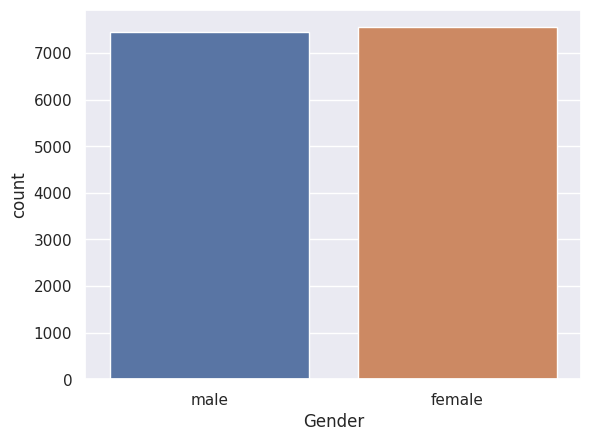

In [15]:
#plotting gender column to number of males and females

sns.countplot(calories_data,x='Gender')

/tmp/ipykernel_19/3367991676.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

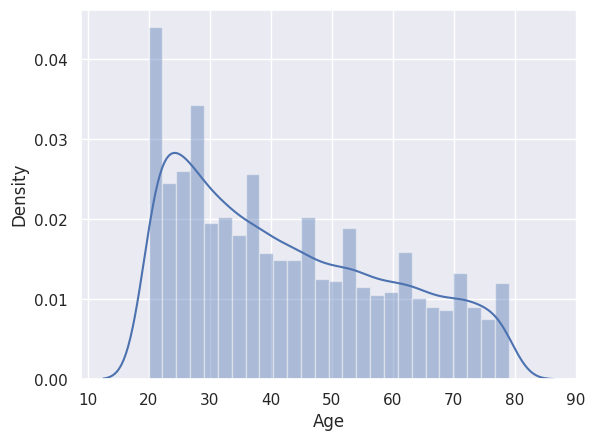

In [16]:
#finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

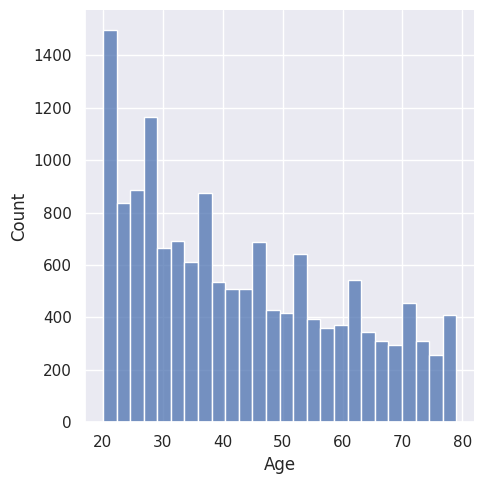

In [17]:
sns.displot(calories_data['Age'])

<Axes: xlabel='Age', ylabel='Count'>

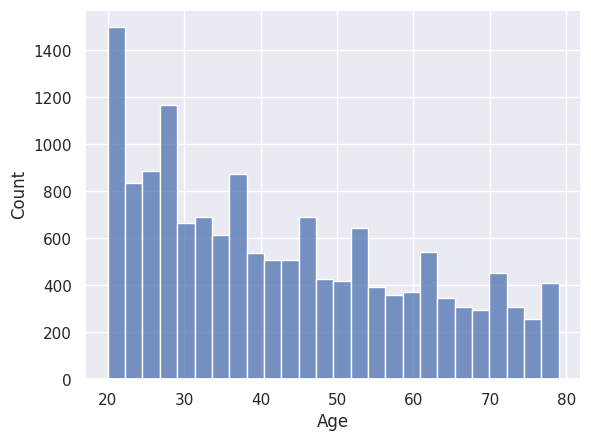

In [18]:
sns.histplot(calories_data['Age'])

/tmp/ipykernel_19/178982985.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

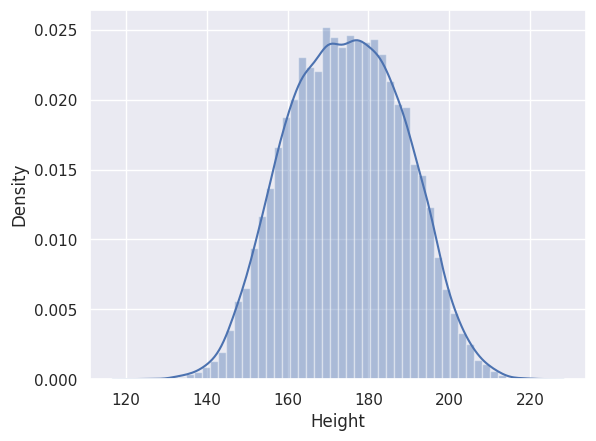

In [19]:
#finding the distribution of "Height" column
sns.distplot(calories_data['Height'])

/tmp/ipykernel_19/3057770523.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

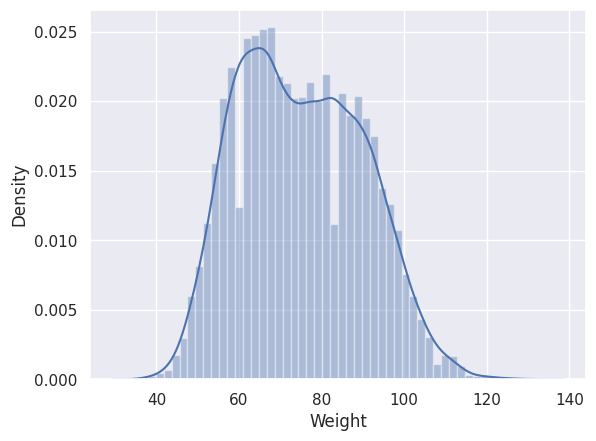

In [20]:
#finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'])

/tmp/ipykernel_19/1910284300.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

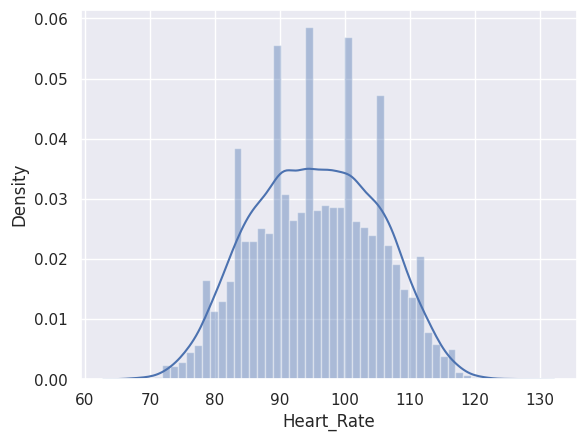

In [21]:
#finding the distribution of "Heart-Rate" column
sns.distplot(calories_data['Heart_Rate'])

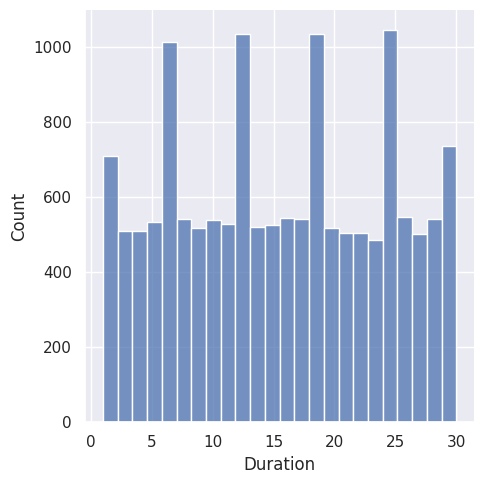

In [22]:
#finding the distribution of "Duration" column
sns.displot(calories_data['Duration'])

In [23]:
#One hot encoding for categorical data

calories_data['Gender']=pd.Categorical(calories_data['Gender'])
calories_data_encoded=pd.get_dummies(calories_data,columns=['Gender'])

In [24]:
correlation_matrix=calories_data_encoded.corr()

<Axes: >

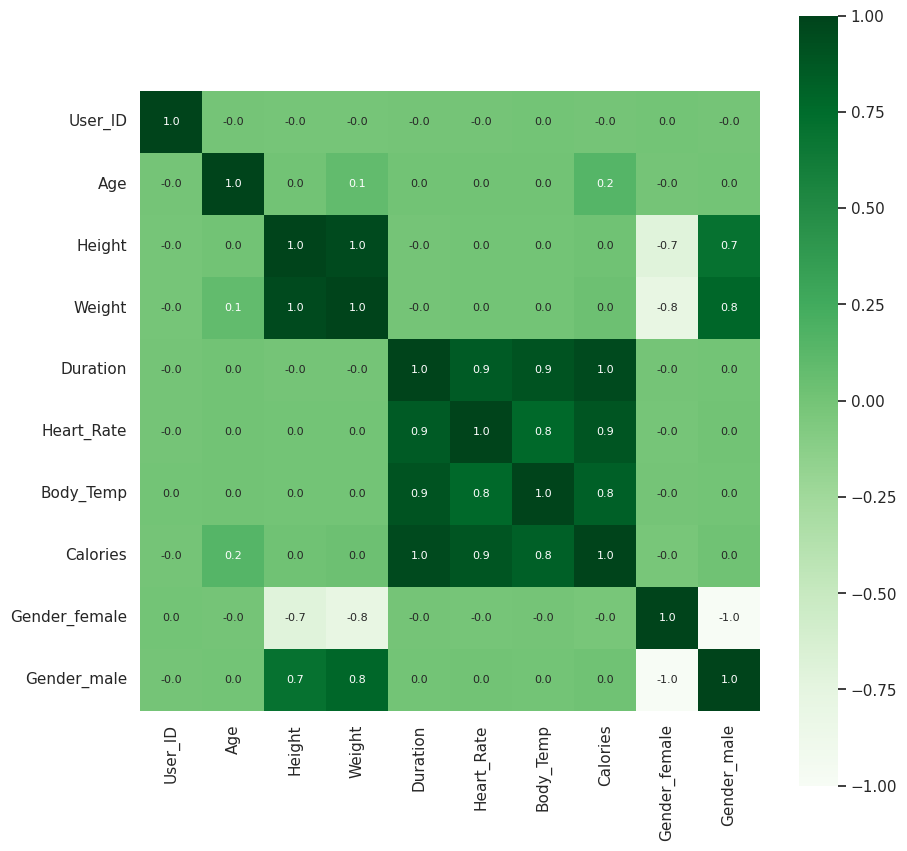

In [25]:
#Constructing a heatmap to understsnad the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

In [26]:
#Without categorical values

calories_data['Gender'] = pd.Categorical(calories_data['Gender'])


categorical_columns = calories_data.select_dtypes(include=['category']).columns

# Excluding categorical columns from correlation calculation
numeric_columns = calories_data.drop(columns=categorical_columns)
correlation = numeric_columns.corr()

<Axes: >

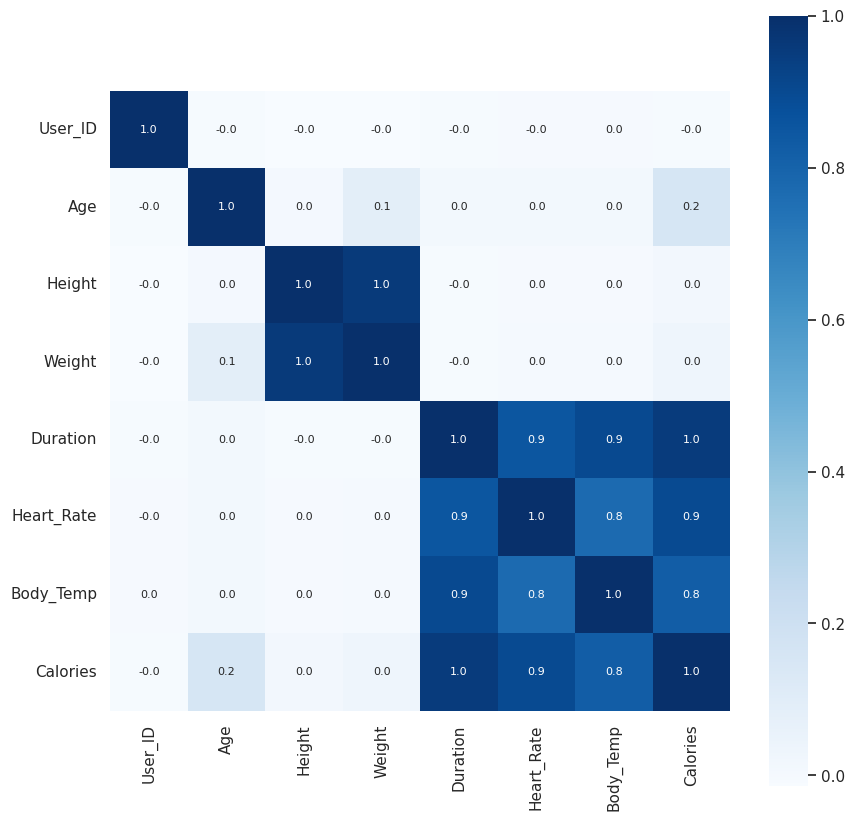

In [27]:
#Constructing a heatmap to understsnad the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [28]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [29]:
calories_data.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [30]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


# Separating features and Target

In [31]:
X=calories_data.drop(columns=['User_ID','Calories'],axis=1)
Y=calories_data['Calories']

In [32]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [33]:
Y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

# Splitting the data into training data and test data

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [35]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(12000, 7) (3000, 7) (12000,) (3000,)


In [36]:
X_train

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
1154,1,38,169.0,67.0,3.0,85.0,38.5
9804,0,30,194.0,96.0,9.0,91.0,39.6
7919,1,78,182.0,79.0,7.0,84.0,39.4
4854,0,50,171.0,77.0,29.0,111.0,40.8
5947,1,32,172.0,66.0,29.0,105.0,40.8
...,...,...,...,...,...,...,...
11798,1,49,178.0,71.0,12.0,98.0,39.9
13896,1,67,159.0,58.0,23.0,101.0,40.4
6637,1,25,167.0,64.0,20.0,100.0,40.4
2575,1,36,167.0,64.0,28.0,108.0,40.8


In [37]:
X_train=X_train.astype(float)

In [38]:
print(X_train.head)

<bound method NDFrame.head of        Gender   Age  Height  Weight  Duration  Heart_Rate  Body_Temp
1154      1.0  38.0   169.0    67.0       3.0        85.0       38.5
9804      0.0  30.0   194.0    96.0       9.0        91.0       39.6
7919      1.0  78.0   182.0    79.0       7.0        84.0       39.4
4854      0.0  50.0   171.0    77.0      29.0       111.0       40.8
5947      1.0  32.0   172.0    66.0      29.0       105.0       40.8
...       ...   ...     ...     ...       ...         ...        ...
11798     1.0  49.0   178.0    71.0      12.0        98.0       39.9
13896     1.0  67.0   159.0    58.0      23.0       101.0       40.4
6637      1.0  25.0   167.0    64.0      20.0       100.0       40.4
2575      1.0  36.0   167.0    64.0      28.0       108.0       40.8
7336      0.0  30.0   187.0    88.0      10.0        94.0       40.2

[12000 rows x 7 columns]>


# Model Training

In [39]:
model=XGBRegressor()

In [40]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Evaluation on test data

In [41]:
#Prediction

test_data_prediction=model.predict(X_test)

In [42]:
print(test_data_prediction)

[125.94     180.8491    38.636337 ... 148.35341   20.833706  91.403206]


# Mean Absolute Error

In [43]:
mean_abs_error=metrics.mean_absolute_error(Y_test,test_data_prediction)

In [44]:
print("Mean Absolute error:",mean_abs_error)

Mean Absolute error: 9.223079592381914
